Task 3
EDA for Stock Prices data and Build a predictive model that can predict stock prices Using Linear Regression Algorithm

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:

stock=pd.read_csv('INR=X.csv')
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0
...,...,...,...,...,...,...,...
257,2021-01-20,73.192001,73.192299,72.899300,73.191902,73.191902,0
258,2021-01-21,72.907898,73.045303,72.883003,72.910896,72.910896,0
259,2021-01-22,72.954903,73.237503,72.929001,72.954903,72.954903,0
260,2021-01-25,72.995903,73.220001,72.877998,72.995903,72.995903,0


In [7]:
stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
stock.shape

(262, 7)

In [9]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,74.373533,74.631087,74.011048,74.358489,74.358489,0.0
std,1.417620,1.494521,1.311330,1.426245,1.426245,0.0
min,71.100403,71.279999,71.064003,71.099998,71.099998,0.0
25%,73.546175,73.706577,73.202003,73.531049,73.531049,0.0
50%,74.332001,74.531300,73.881748,74.275799,74.275799,0.0
75%,75.484551,75.737499,75.067053,75.489424,75.489424,0.0
max,77.684998,77.754997,76.496300,77.570000,77.570000,0.0


In [10]:
correlation=stock.corr()
correlation

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.977461,0.973483,0.988920,0.988920,NaN
High,0.977461,1.000000,0.960726,0.976949,0.976949,NaN
Low,0.973483,0.960726,1.000000,0.979301,0.979301,NaN
Close,0.988920,0.976949,0.979301,1.000000,1.000000,NaN
Adj Close,0.988920,0.976949,0.979301,1.000000,1.000000,NaN
Volume,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

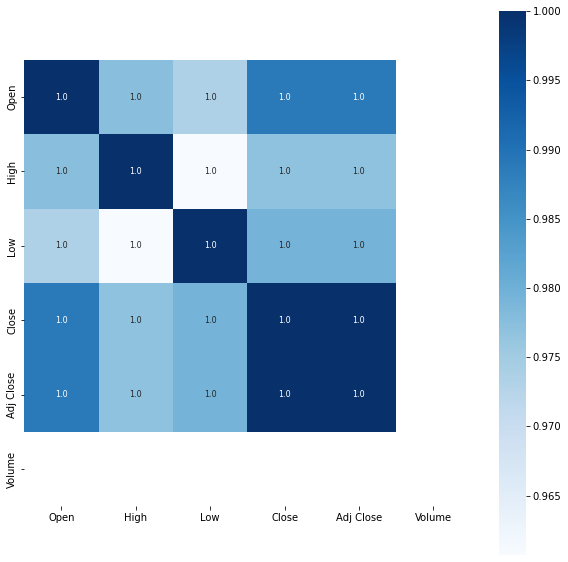

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

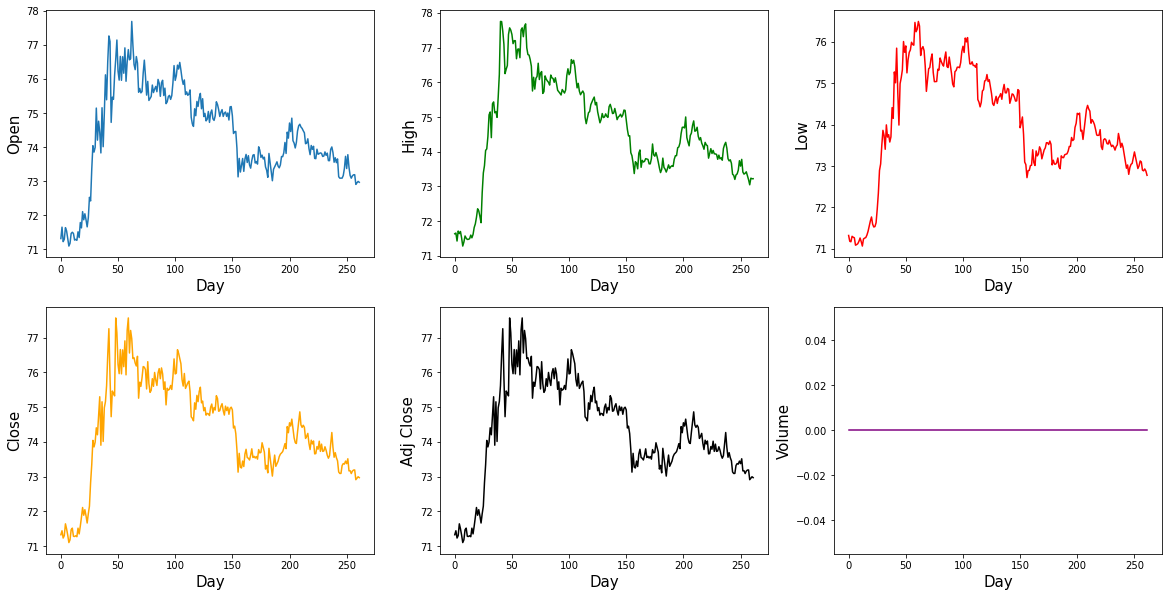

In [10]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))

ax1.plot(stock['Open'])
ax1.set_xlabel("Day", fontsize=15)
ax1.set_ylabel("Open", fontsize=15)

ax2.plot(stock['High'], color='green')
ax2.set_xlabel("Day", fontsize=15)
ax2.set_ylabel("High", fontsize=15)

ax3.plot(stock['Low'], color='red')
ax3.set_xlabel("Day", fontsize=15)
ax3.set_ylabel("Low", fontsize=15)

ax4.plot(stock['Close'], color='orange')
ax4.set_xlabel("Day", fontsize=15)
ax4.set_ylabel("Close", fontsize=15)

ax5.plot(stock['Adj Close'], color='black')
ax5.set_xlabel("Day", fontsize=15)
ax5.set_ylabel("Adj Close", fontsize=15)

ax6.plot(stock['Volume'], color='purple')
ax6.set_xlabel("Day", fontsize=15)
ax6.set_ylabel("Volume", fontsize=15)

plt.show()

In [11]:
stock.drop([
    'Date'
],axis = 1, inplace = True)
x=stock.drop(['Close'],axis=1)
x

,Open,High,Low,Adj Close,Volume
0,71.320000,71.635002,71.320000,71.324997,0
1,71.654999,71.654999,71.178001,71.440002,0
2,71.230103,71.425003,71.168503,71.230400,0
3,71.300003,71.711998,71.300003,71.300003,0
4,71.639999,71.639999,71.277496,71.639999,0
...,...,...,...,...,...
257,73.192001,73.192299,72.899300,73.191902,0
258,72.907898,73.045303,72.883003,72.910896,0
259,72.954903,73.237503,72.929001,72.954903,0
260,72.995903,73.220001,72.877998,72.995903,0


In [12]:
y=stock['Close']
y

0      71.324997
1      71.440002
2      71.230400
3      71.300003
4      71.639999
         ...    
257    73.191902
258    72.910896
259    72.954903
260    72.995903
261    72.970001
Name: Close, Length: 262, dtype: float64

In [13]:
x_test ,x_train ,y_test ,y_train =train_test_split(x,y ,test_size=.2 ,random_state=2)

In [14]:
x_train.shape



(53, 5)

In [15]:
x_test.shape

(209, 5)

In [16]:
y_train.shape

(53,)

In [17]:
y_test.shape

(209,)

In [19]:
model=RandomForestRegressor()

In [20]:
model.fit(x_train ,y_train)

RandomForestRegressor()

In [21]:
model.score(x_train ,y_train)

0.9989698632147578

In [22]:
training_data_prediction=model.predict(x_train)
training_data_prediction


array([75.81631799, 75.6441958 , 75.23972822, 76.51631189, 71.37382313,
       75.53291982, 75.97576962, 73.54313708, 73.85559078, 73.59549853,
       75.53412641, 75.94924372, 76.4069242 , 76.2765704 , 74.75004079,
       73.93775609, 74.01434879, 73.81028859, 71.47280117, 74.95168385,
       73.97349923, 74.94866098, 73.78270077, 75.71991298, 73.2444668 ,
       71.3544177 , 73.93141996, 74.10095369, 76.42205632, 73.29744222,
       75.89239004, 74.61696774, 73.54305567, 76.01520369, 73.68495544,
       73.14080604, 75.51831931, 75.00710414, 76.35101743, 71.95311214,
       75.99944309, 73.35142364, 73.54484442, 76.2764084 , 71.86024031,
       73.93631577, 73.75026587, 74.68265836, 73.11735258, 73.17599209,
       73.64895166, 74.8483205 , 74.74670019])

In [23]:
testing_data_prediction=model.predict(x_test)
testing_data_prediction


array([73.68665402, 73.67168138, 71.65782058, 75.78907459, 74.57616266,
       71.37854059, 73.8670945 , 75.53196931, 71.67635244, 73.65610212,
       73.20751004, 75.51561831, 72.36241168, 73.50119487, 74.44599081,
       73.58662978, 74.18452084, 74.97904398, 74.81269404, 74.69398305,
       71.36829745, 71.3544177 , 73.47714582, 71.47076014, 73.72570396,
       71.3544177 , 73.69600769, 74.29420412, 74.71897937, 75.00606916,
       73.62184406, 73.87490299, 73.70915137, 76.34249818, 75.00204244,
       75.66243847, 73.81827813, 73.30657297, 75.98838271, 74.87353328,
       71.46183622, 74.93775099, 73.12469658, 75.49598621, 75.57161482,
       74.83315202, 73.44208597, 73.06219243, 73.60711426, 76.49443883,
       76.485746  , 75.44754336, 73.36524169, 73.95866157, 76.03197726,
       73.13357616, 73.17779845, 75.56131472, 74.7742497 , 74.64469198,
       74.01590753, 71.3544177 , 73.63642632, 73.40436548, 73.71607236,
       73.51313913, 71.48413113, 71.4025875 , 75.67563895, 73.89

In [24]:

model.fit(x_train ,y_train)


RandomForestRegressor()

In [25]:
model.score(x_train ,y_train)

0.9987166963518314

In [26]:
score1 = metrics.r2_score(y_train ,training_data_prediction)

score1

0.9989698632147578

In [27]:
score11 = metrics.r2_score(y_test ,testing_data_prediction)
score11

0.9831263985664676

In [28]:
score2 = metrics.mean_absolute_error(y_train ,training_data_prediction)
score2

0.030624354716981935

In [29]:
score22 = metrics.mean_absolute_error(y_test ,testing_data_prediction)
score22

0.10259648607656069

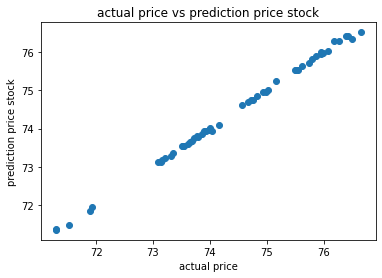

In [30]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('actual price')
plt.ylabel('prediction price stock')
plt.title('actual price vs prediction price stock')
plt.show()